In [1]:
## Imports

import pandas as pd
import io
import matplotlib.pyplot as plt
import time
from sklearn.metrics import roc_auc_score

import re
import string
import nltk
import itertools
import numpy as np

# this allows you to apply a progress bar to pandas operations
from tqdm import tqdm
tqdm.pandas()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Github repo installation of paddle
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple
# Install paddle OCR
!pip install paddleocr
# git clone
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
# cv2
!pip install "opencv-python-headless<4.3"


Looking in indexes: https://mirror.baidu.com/pypi/simple

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46153, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 46153 (delta 7), reused 13 (delta 2), pack-reused 46130
Receiving objects: 100% (46153/46153), 339.17 MiB | 44.37 MiB/s, done.
Resolving deltas: 100% (32429/32429), done.
Updating files: 100% (1620/1620), done.

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import os

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillo

In [4]:
ocr_model = PaddleOCR(lang='en')

def extract_text(image_path):
    result = ocr_model.ocr(image_path)
    
    return [res[1][0] for res in result]

[2023/04/14 12:23:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, shape_info_filename=None, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='/home/studio-lab-user/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='/home/studio-lab-user/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_bat

---    Fused 0 subgraphs into layer_norm op.
---    Fused 0 subgraphs into layer_norm op.


In [5]:
image_path = "/home/studio-lab-user/DS-Projects/OCR/OCR_images"
font_path = "/home/studio-lab-user/DS-Projects/OCR/PaddleOCR/doc/fonts/latin.ttf"

In [34]:
img_path = f'{image_path}/multiple_spaces.jpg'
extract_text(img_path)

[2023/04/14 12:48:14] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/14 12:48:14] ppocr DEBUG: dt_boxes num : 11, elapse : 0.30179595947265625
[2023/04/14 12:48:15] ppocr DEBUG: rec_res num  : 11, elapse : 1.2980704307556152


['Double Space',
 'TripleSpace',
 'Four',
 'Space',
 'Double',
 'Spacing',
 'University',
 'St Andrews',
 'Your Name Here',
 'Class of 20XX']

In [35]:
new_text = []
text = extract_text(img_path)[0]
print("Extracted text from image: ", text)
new_text.extend(text.split())
print("Splited words and add into empty list: ", new_text)
number_of_space = text.count(" ") # number of spaces +1 is chunk of words
print("Number of spaces:", number_of_space)

[2023/04/14 12:48:18] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/14 12:48:18] ppocr DEBUG: dt_boxes num : 11, elapse : 0.22896480560302734
[2023/04/14 12:48:19] ppocr DEBUG: rec_res num  : 11, elapse : 1.390632152557373
Extracted text from image:  Double Space
Splited words and add into empty list:  ['Double', 'Space']
Number of spaces: 1


# 3. Visualise Results

In [36]:
%cd /home/studio-lab-user/DS-Projects/OCR/PaddleOCR

/home/studio-lab-user/DS-Projects/OCR/PaddleOCR


In [37]:
def visualisation(image_path):
    result = ocr_model.ocr(image_path)
    print(result)
    boxes = [res[0] for res in result]
    texts = [res[1][0] for res in result]
    print(texts)
    scores = [res[1][1] for res in result]
    img = cv2.imread(img_path) # import images
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # reorders the colour channels
    
    plt.figure(figsize=(15,15))
    annotated = draw_ocr(img, boxes, texts, scores)
    plt.imshow(annotated)

[2023/04/14 12:48:23] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/14 12:48:23] ppocr DEBUG: dt_boxes num : 11, elapse : 0.3352773189544678
[2023/04/14 12:48:25] ppocr DEBUG: rec_res num  : 11, elapse : 1.7359871864318848
[[[[122.0, 5.0], [233.0, 5.0], [233.0, 22.0], [122.0, 22.0]], ('Double Space', 0.9711160659790039)], [[[121.0, 28.0], [227.0, 28.0], [227.0, 45.0], [121.0, 45.0]], ('TripleSpace', 0.9899366497993469)], [[[119.0, 49.0], [178.0, 53.0], [177.0, 71.0], [118.0, 67.0]], ('Four', 0.9339208006858826)], [[[179.0, 52.0], [224.0, 52.0], [224.0, 68.0], [179.0, 68.0]], ('Space', 0.9980010986328125)], [[[120.0, 70.0], [178.0, 70.0], [178.0, 87.0], [120.0, 87.0]], ('Double', 0.9985019564628601)], [[[241.0, 71.0], [303.0, 71.0], [303.0, 89.0], [241.0, 89.0]], ('Spacing', 0.9982565641403198)], [[[199.0, 188.0], [261.0, 190.0], [260.0, 208.0], [198.0, 205.0]], ('University', 0.9793605804443359)],

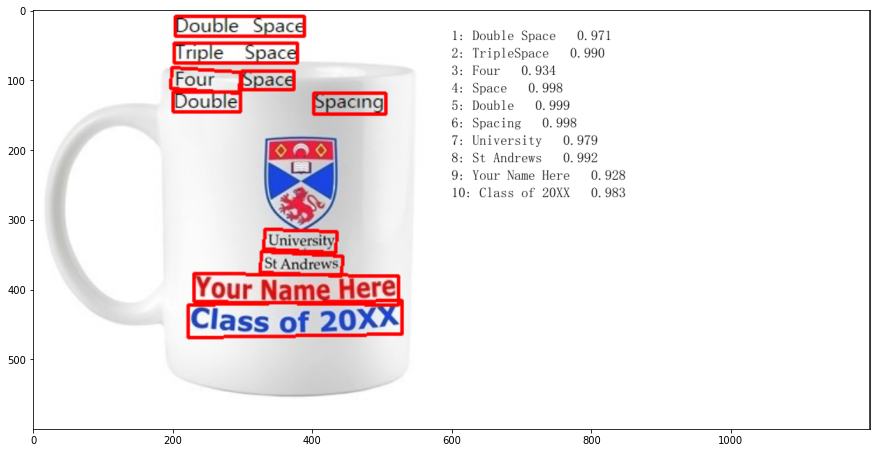

In [38]:
visualisation(img_path)

In [34]:
%cd /home/studio-lab-user/DS-Projects/OCR/OCR_image_test

/home/studio-lab-user/DS-Projects/OCR/OCR_image_test


In [35]:
def get_words_and_scores_and_add_to_dataframe(row):
    photo = row["image"]
    if photo == "empty":
        return [[],[]]
    
    image_path = f"/home/studio-lab-user/DS-Projects/OCR/OCR_image_test/{photo}"
    result = ocr_model.ocr(image_path)
    text = [res[1][0] for res in result]
    scores = [res[1][1] * 100 for res in result]
    result = [text, scores]
    return result

In [36]:
image_df = image_df[image_df['image'] != '.ipynb_checkpoints']

NameError: name 'image_df' is not defined

In [37]:
image_df["words"] = image_df.apply(get_words_and_scores_and_add_to_dataframe, axis=1)
image_df

NameError: name 'image_df' is not defined

In [30]:
import re
import string
def clean_text(row):
    word_list = row["words"][0]
    new_word_list = []
    for word in word_list:
        new_word = word.lower()
        new_word = re.sub("[%s]" % re.escape(string.punctuation), " ", new_word)
        new_word_list.append(new_word)
    return [new_word_list, row["words"][1]]

In [31]:
image_df["words"] = image_df.apply(clean_text, axis=1)

In [32]:
## define the target words / phrases

targets = ["among us", "impostor"]

In [33]:
# helper functions for funal scoring function

def advance(iterator, step):
    next(itertools.islice(iterator, step, step), None)


def tuplewize(iterable, size):
    iterators = itertools.tee(iterable, size)
    for position, iterator in enumerate(iterators):
        advance(iterator, position)
    return zip(*iterators)

In [37]:
# define function to produce final scores

def get_final_score(row):
    sample_list = row["words"][0]
    score_list = row["words"][1]
    max_score = 0
    
    for target in targets:
        phrase_length = len(target.split())
        for i in range(1, phrase_length+1):
            for c, s in zip(tuplewize(sample_list, i), tuplewize(score_list, i)):
                new_sample = " ".join(c)
                edit_distance = nltk.edit_distance(target, new_sample)
                closeness = (len(target)-edit_distance)/len(target)
                confidence_score = np.mean(s)
                final_score = closeness * confidence_score
                if final_score > max_score:
                    max_score = final_score
             
    return max_score

In [38]:
import itertools
import nltk
import numpy as np

image_df["OCR_score"] = image_df.apply(get_final_score, axis=1)

In [39]:
image_df = image_df.sort_values(by='OCR_score', ascending=False)
pd.set_option('display.max_rows', None)
image_df

,image,words,OCR_score
1,among (113).jpg,"[[vwouc n2, among us, 0], [64.9809718132019, 9...",99.664366
3,among (114).jpg,"[[vwonq n2, among us, impostor], [76.330381631...",99.367929
5,among (118).jpg,"[[vwon n2, among us], [80.00211119651794, 95....",95.940566
4,among (117).jpg,"[[impostor], [91.23769998550415]]",91.237700
0,among (116).jpg,"[[], []]",0.000000
2,among (115).jpg,"[[face changing], [99.66462850570679]]",0.000000
6,among (119).jpg,"[[], []]",0.000000
